Title: Classification Model Performance Metrics

Accuracy, Precision, Recall, F1-Score:

Task 1: Evaluate a binary classifier for spam detection using accuracy, precision, recall and F1-score.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import NotFittedError

data = {
    'text': ['Free money now!', 'Important: Please read this email', 'Congrats, you won!', 'Your account has been compromised'],
    'label': ['spam', 'ham', 'spam', 'ham']
}

df = pd.DataFrame(data)

if df.isnull().any().any():
    raise ValueError("Input data contains null values.")

df['label'] = df['label'].map({'spam': 1, 'ham': 0})

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42, stratify=df['label'])

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")




Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1-score: 0.6667



Task 2: Compare performance of a multi-class classifier on recognizing animals.

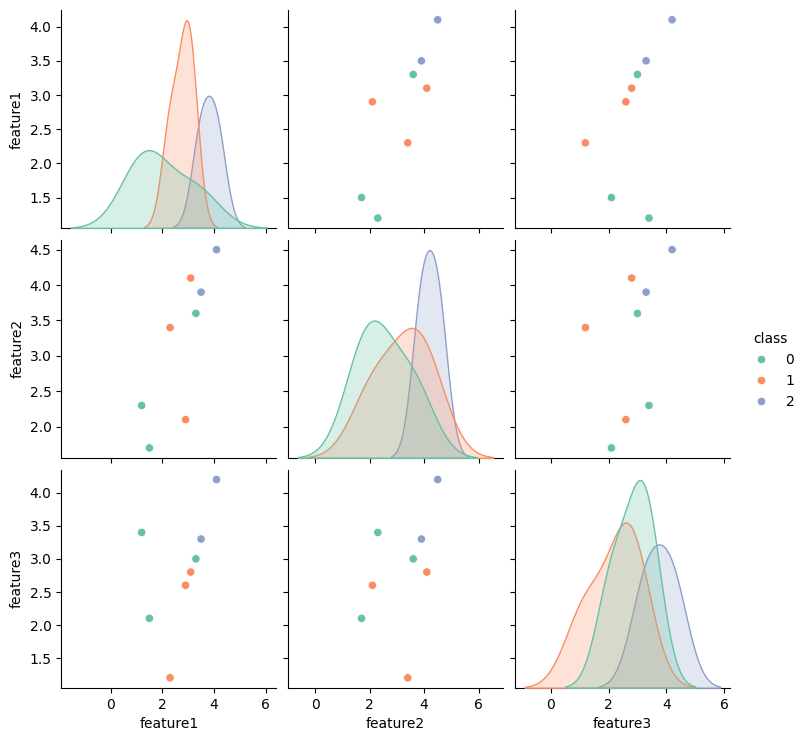

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         cat       1.00      1.00      1.00         1
         dog       1.00      1.00      1.00         1
      rabbit       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = {
    'feature1': [1.2, 2.3, 3.1, 1.5, 3.5, 4.1, 2.9, 3.3],
    'feature2': [2.3, 3.4, 4.1, 1.7, 3.9, 4.5, 2.1, 3.6],
    'feature3': [3.4, 1.2, 2.8, 2.1, 3.3, 4.2, 2.6, 3.0],
    'class': ['cat', 'dog', 'dog', 'cat', 'rabbit', 'rabbit', 'dog', 'cat']
}

df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

X = df.drop(columns='class')
y = df['class']

# Exploratory Data Analysis (pairplot)
sns.pairplot(pd.concat([X, df['class']], axis=1), hue='class', palette='Set2')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Task 3: Analyze classifier performance for predicting disease outbreaks.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

data = {
    'temperature': [30.1, 35.2, 22.3, 29.8, 31.5, 40.0, 25.3, 33.7],
    'humidity': [70, 60, 80, 65, 50, 55, 90, 60],
    'population_density': [150, 200, 100, 130, 170, 180, 220, 140],
    'marital_status': ['single', 'married', 'single', 'married', 'divorced', 'divorced', 'married', 'single'],
    'previous_outbreak': [1, 0, 1, 1, 0, 0, 1, 1],
    'outbreak': [1, 0, 1, 1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

if df.isnull().any().any():
    raise ValueError("Input data contains null values.")

categorical_cols = ['marital_status']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(columns=categorical_cols), encoded], axis=1)

X = df.drop(columns='outbreak')
y = df['outbreak']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

